# Update Wflow_sbm Land Cover

This Notebook updates the parameterset by the newly created land cover map for the scenario. 

More information about the parameters that are adjusted by a changed land cover map can be found here: https://deltares.github.io/hydromt_wflow/latest/_generated/hydromt_wflow.WflowModel.setup_lulcmaps.html

## Import the required packages

In [10]:
import numpy as np
import pandas as pd
import hydromt
import hydromt_wflow
from hydromt import DataCatalog
import geopandas as gpd

## Locate the scenario parameterset

In [3]:
orgmod = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\Scenarios\wflow_sbm_geul_scenario3e3"

## Open the model in adjustment mode

In [4]:
model = hydromt_wflow.WflowModel(orgmod, mode= 'r+')

Model dir already exists and files might be overwritten: C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\Scenarios\wflow_sbm_geul_scenario3e3\staticgeoms.
Model dir already exists and files might be overwritten: C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\Scenarios\wflow_sbm_geul_scenario3e3\run_default.


## Read the staticmaps

In [5]:
model.read_staticmaps()

In [6]:
model.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/74)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_laterals         (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_laterals       (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    pits                          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

## Locate the Datacatalog, containing the location of the scenario geotiff

In [7]:
ds = DataCatalog("QGIS/Scenarios/data_catalog.yml")

In [8]:
dc = ds.get_rasterdataset('corine')

## Check the scenario geotiff

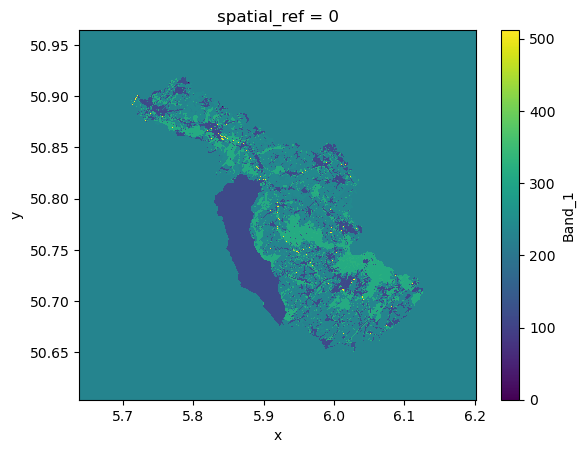

In [9]:
dc.plot();

## Update the land cover map and the corresponding parameters

In [92]:
data_libs = ["QGIS/Scenarios/data_catalog.yml"]  # this catalog contains the 'corine' data source
newmod = hydromt_wflow.WflowModel(r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Modellen\Wflow\Scenarios\wflow_sbm_geul_scenario3e3",
                 data_libs=data_libs, mode='r+')  # initialize model with default logger in append mode
newmod.setup_lulcmaps(lulc_fn="corine")
newmod.write_staticmaps()  # write static maps component with updated lu 

In [93]:
newmod.staticmaps

<xarray.Dataset>
Dimensions:                       (lat: 33, lon: 50, time: 12, layer: 4)
Coordinates:
  * lat                           (lat) float64 50.92 50.91 50.9 ... 50.66 50.65
  * lon                           (lon) float64 5.718 5.727 ... 6.118 6.127
  * time                          (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * layer                         (layer) int64 0 1 2 3
    spatial_ref                   int32 0
Data variables: (12/74)
    x_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    y_out                         (lat, lon) float64 nan nan nan ... nan nan nan
    idx_out                       (lat, lon) int32 -1 -1 -1 -1 ... -1 -1 -1 -1
    wflow_ldd                     (lat, lon) uint8 255 255 255 ... 255 255 255
    wflow_subcatch                (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_uparea                  (lat, lon) float32 -9.999e+03 ... -9.999e+03
    ...                            ...
    wflow_subcatch_geul_stations  (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_sobek            (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_sobek          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_gauges_laterals         (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    wflow_subcatch_laterals       (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    pits                          (lat, lon) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0

## Check the new land use map in the parameterset

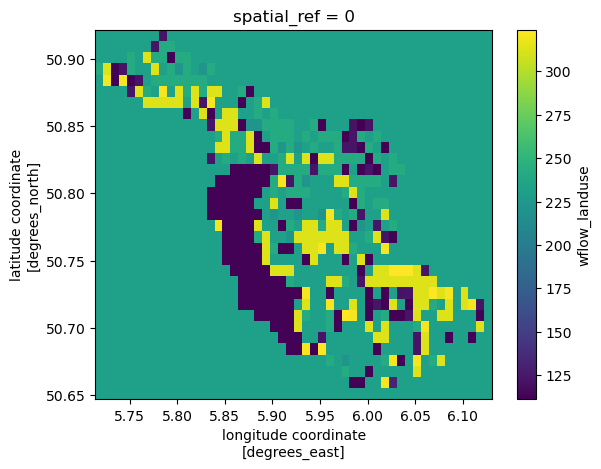

In [94]:
newmod.staticmaps.wflow_landuse.raster.mask_nodata().plot()